In [1]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
from scipy.optimize import root

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)
#notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

# data set when at office 
#filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
# data set when at home
filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'

In [2]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_1()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": V_initial_dis,
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, 10*int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [4]:
time = 3.3*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

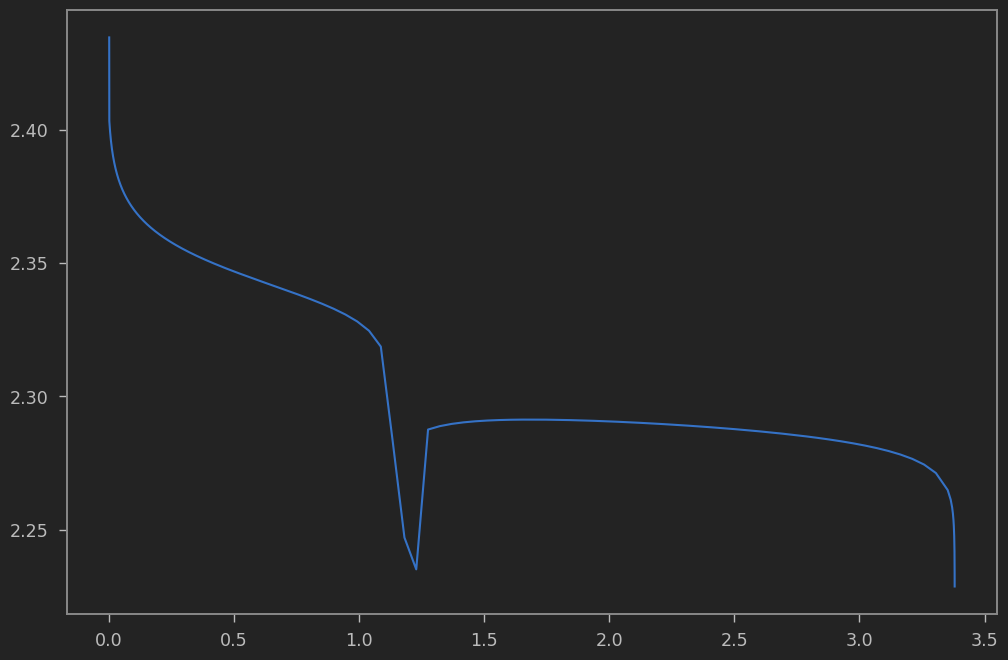

In [5]:
plt.plot(1.7*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)

Text(0, 0.5, 'Unfitted Resistance [Ohms]')

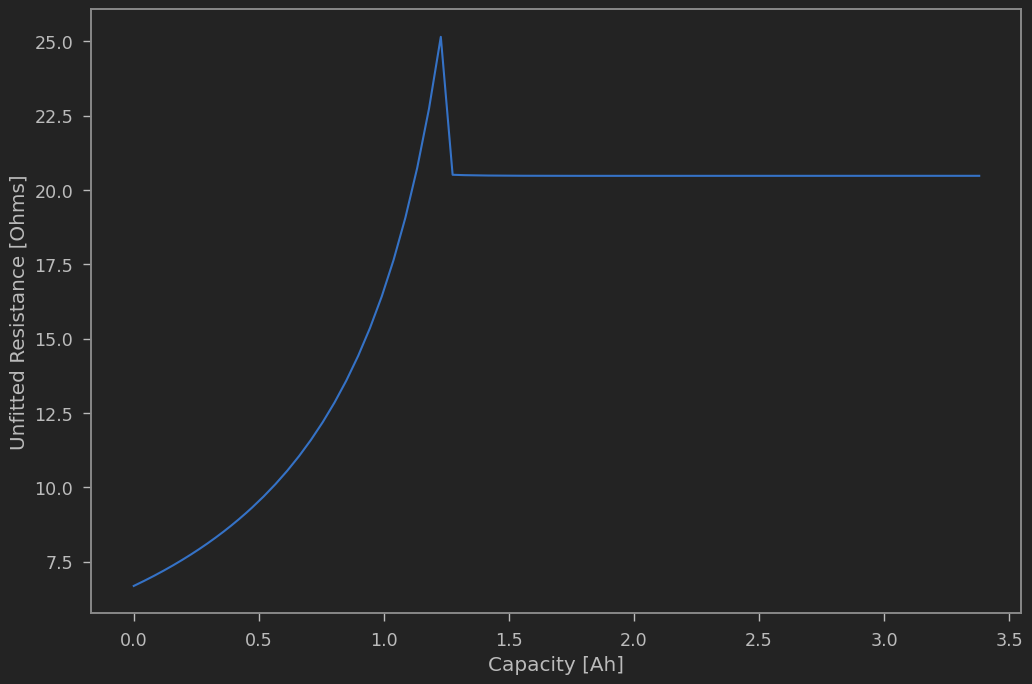

In [11]:
sigma_0 = 1
l =  1
A = 0.15

capacity = 1.7*sim.solution.t/3600
#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 
b = 1
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity,R)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Unfitted Resistance [Ohms]')

Text(0, 0.5, 'Li ion [g]')

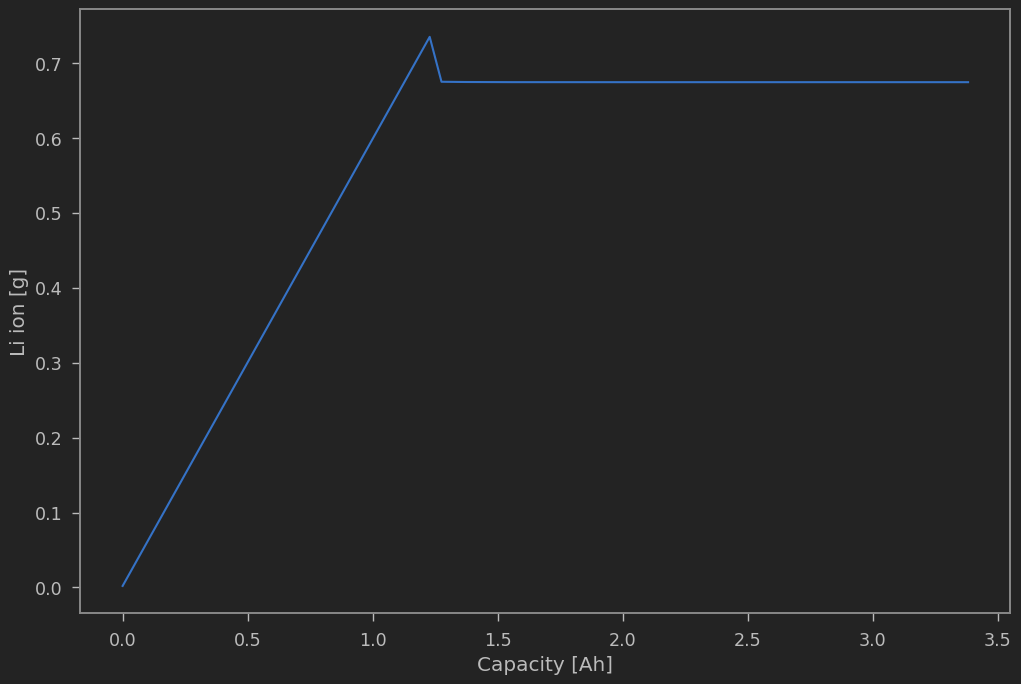

In [12]:
plt.plot(capacity,Li)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

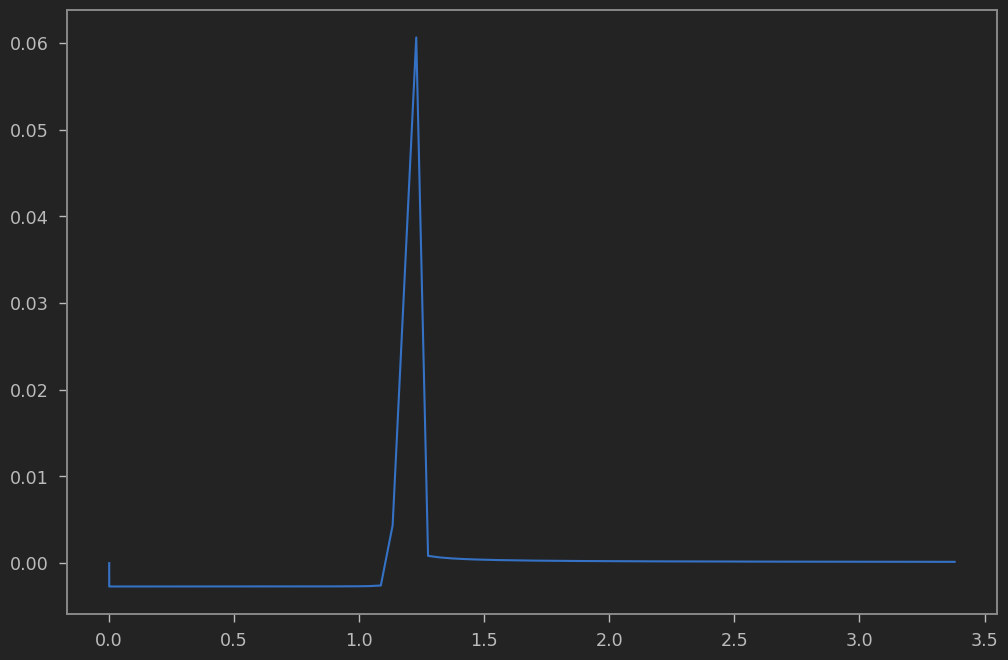

In [14]:
plt.plot(capacity,sim.solution['S [g]'].entries)

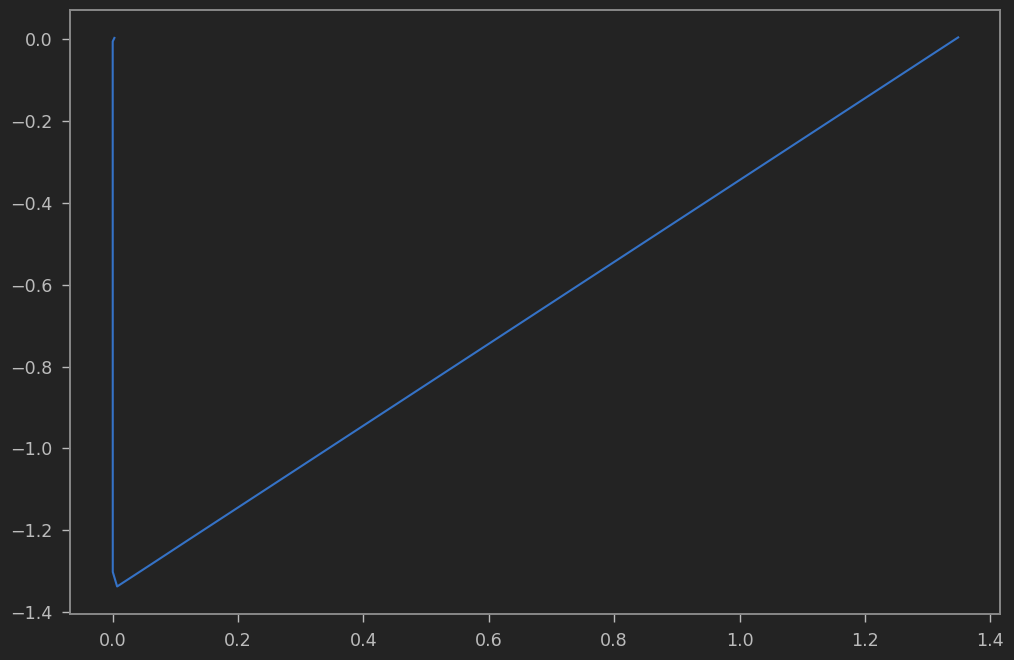

In [17]:
S2 = sim.solution["S2 [g]"].entries
S4 = sim.solution["S4 [g]"].entries
S2_theoretical = S2[0] + 0.5*(S4[0] - S4)
plt.plot(S2, S2_theoretical)

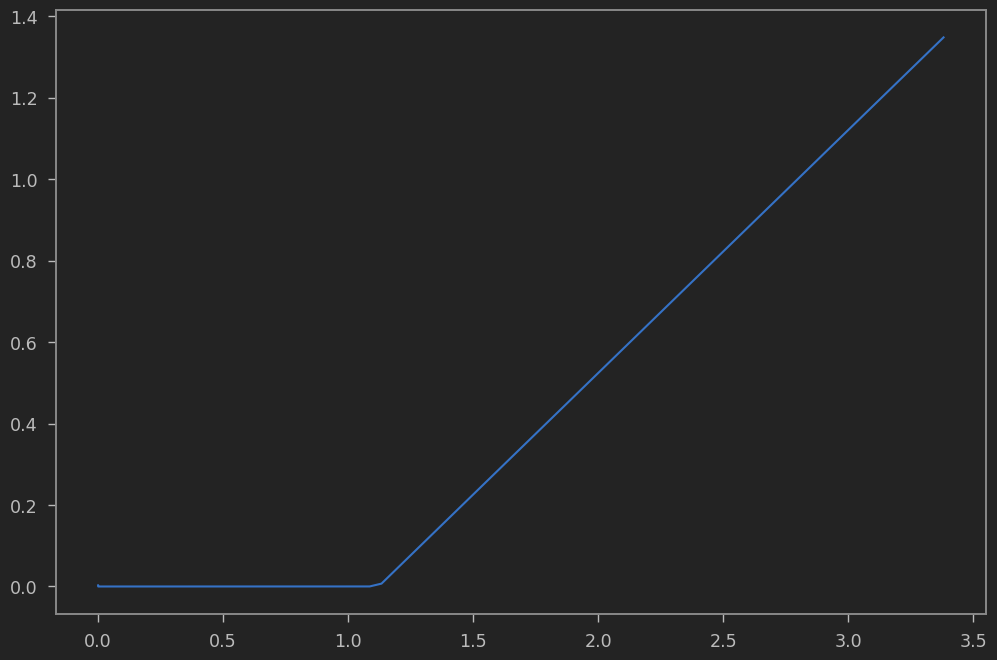

In [18]:
plt.plot(capacity, S2)

In [102]:
Ms = 32
F = 9.649e4

f_l = 0.0665
EL0 = 2.195
EH0 = 2.35
V = 2.4
R = 8.3145
T = 298
f_h = 0.7296
ih0 = 10
ar = 0.960
I = 1.7


def S4_func(S8):
    constant = 3600*3.4*Ms/F
    return constant - (3*S8/2)

def S2_func(S4, S1):
    constant = f_l*np.exp(4*F*(EL0-V)/(R*T))
    return constant*S4/(S1**2)

def S8_root(S8):
    S4 = S4_func(S8)
    EH = EH0 + (R*T)*np.log(f_h*S8/(S4**2))/(4*F)
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(4*F*eta_H/(2*R*T))
    return I - iH

In [103]:
# First find the root for S8

S8 = root(S8_root, 1e-4)
S8_initial = S8['x'][0]
S8_initial

2.6887870865850063

In [105]:
# Check root function is successful

S8_root(S8_initial)

1.5659296082048968e-10

In [106]:
# Second solve for S4 in terms of S4
S4_initial = S4_func(S8_initial)
S4_initial

0.026100124604820252

In [107]:
# capacity check

F*(1.5*S8_initial  + S4_initial)/(3600*Ms)

3.4000000000000004

In [108]:
orders = np.linspace(-10,-5,6)
S1_trials = 10**orders

S2_list = []
for S1 in S1_trials:
    S2 =  S2_func(S4_initial, S1)
    S2_list.append(S2)
    
S2_list

[2349.685035135339,
 23.49685035135339,
 0.2349685035135339,
 0.0023496850351353397,
 2.3496850351353395e-05,
 2.3496850351353388e-07]

In [137]:
# data for combined plot

data_dict = {}

In [180]:
loc = 6
print(S8_initial)
print(S4_initial)
print(S2_list[loc])
print(S1_trials[loc])

2.6887870865850063
0.026100124604820252


IndexError: list index out of range

In [174]:
# V = EL check
EL0 + (R*T)*np.log(f_l*S4_initial/((S1_trials[loc]**2)*S2_list[loc]))/(4*F)

2.4

In [175]:


model = pybamm.lithium_sulfur.ZeroD_Chemistry_1()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": V_initial_dis,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_list[loc],
        "Initial Condition for S ion [g]" : S1_trials[loc],
        "Lower voltage cut-off [V]" : 2.1,
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        #dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

In [176]:
time = 3.39*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

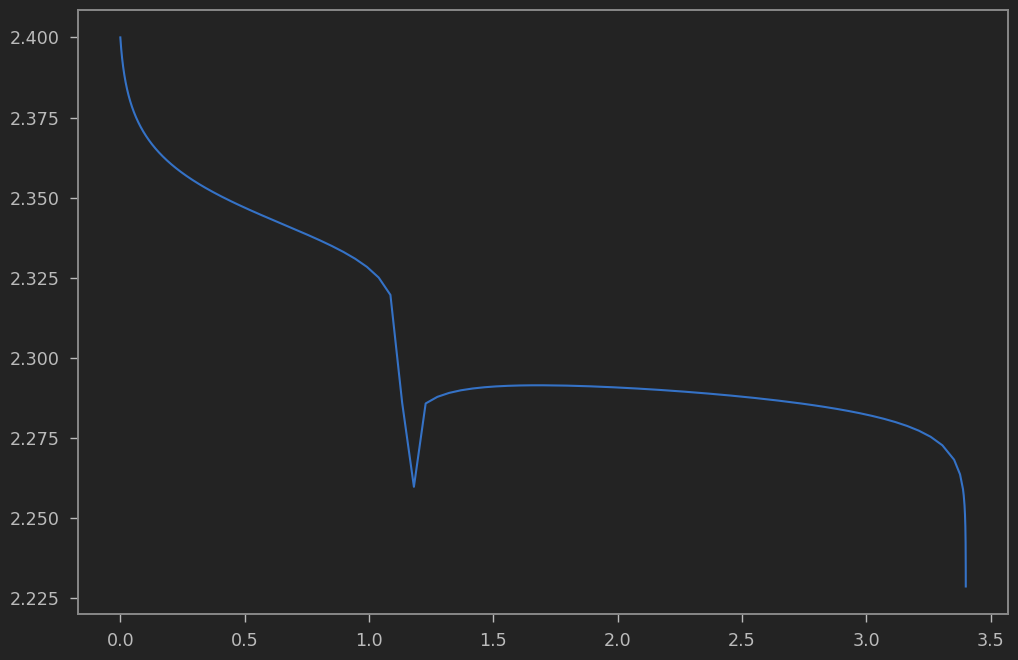

In [177]:
capacity = 1.7*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

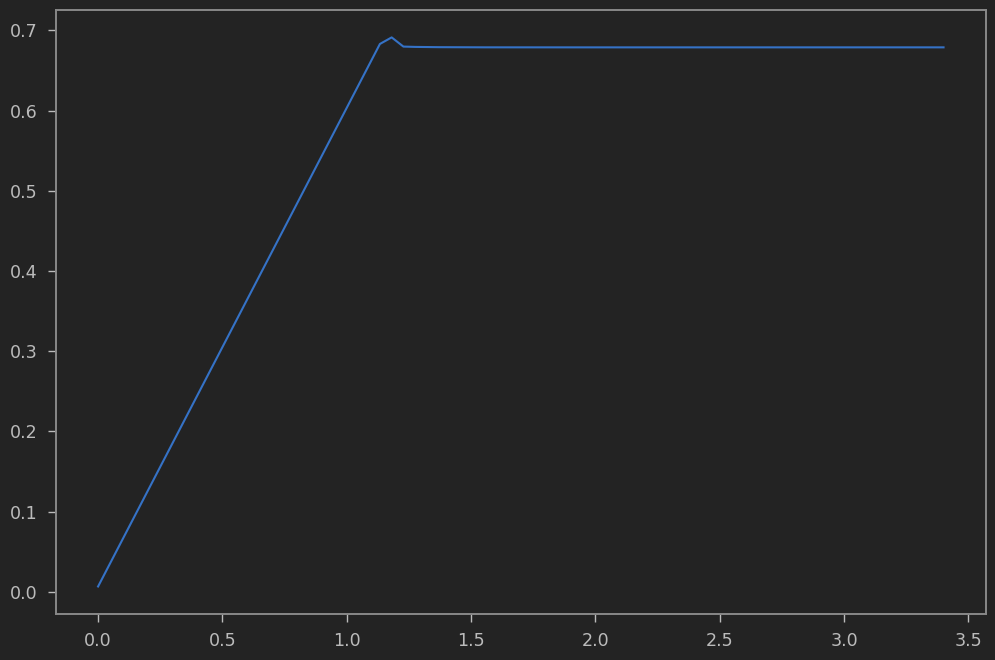

In [178]:

#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)

In [179]:
data_dict[str(loc)] = [capacity, V, Li]

Text(0, 0.5, 'Voltage [V]')

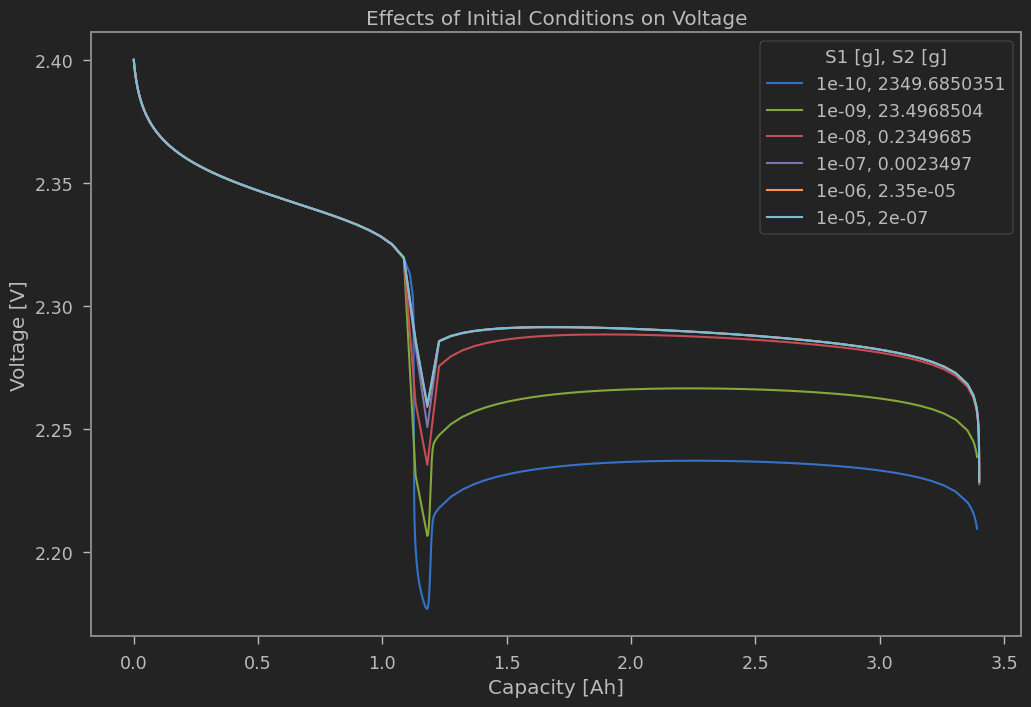

In [186]:
loc_list = [0,1,2,3,4,5]
legend = []
for loc in loc_list:
    c = data_dict[str(loc)][0]
    v = data_dict[str(loc)][1]
    plt.plot(c,v)
    legend.append(str(S1_trials[loc]) + ', ' + str(round(S2_list[loc],7)))
    
plt.legend(legend, title = 'S1 [g], S2 [g]')
plt.title("Effects of Initial Conditions on Voltage")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

Text(0, 0.5, 'Rescaled Li ion [g] (see documentation)')

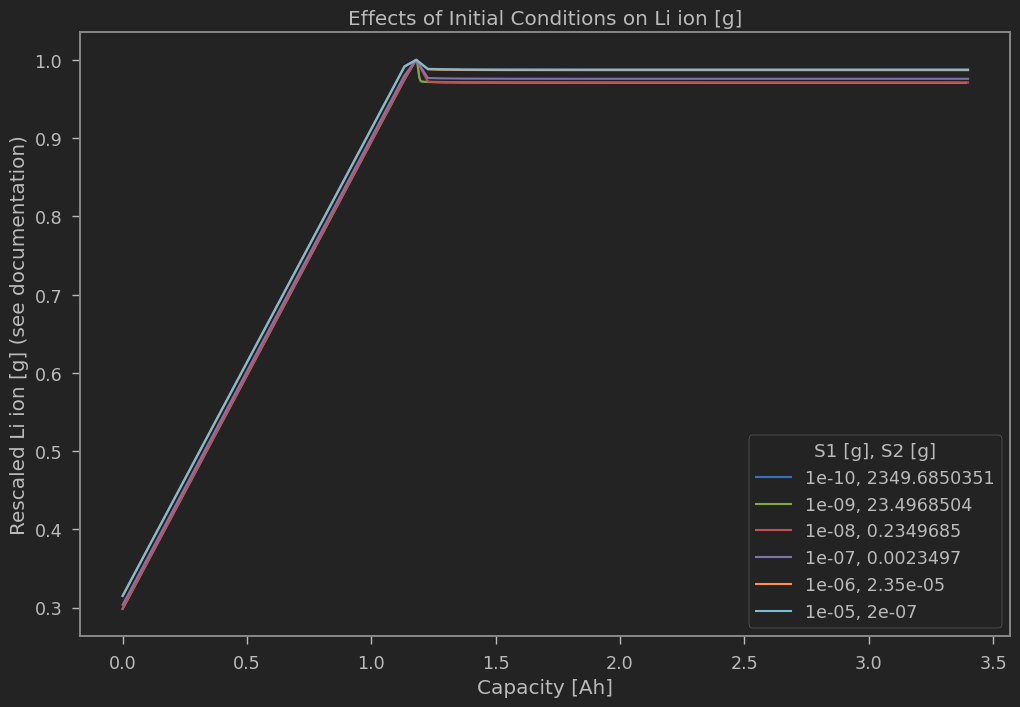

In [195]:
loc_list = [0,1,2,3,4,5]
legend = []
for loc in loc_list:
    c = data_dict[str(loc)][0]
    l = data_dict[str(loc)][2]
    plt.plot(c,l - max(l) + 1)
    legend.append(str(S1_trials[loc]) + ', ' + str(round(S2_list[loc],7)))
    
plt.legend(legend, title = 'S1 [g], S2 [g]')
plt.title("Effects of Initial Conditions on Li ion [g]")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Rescaled Li ion [g] (see documentation)')

# Chemistry 4

In [303]:
Ms = 32
F = 9.649e4
V = 2.4
R = 8.3145
T = 298
ar = 0.960
I = 1.7
nu = 0.0114

f_l = (Ms*nu/2)**(1/2)
f_m = (Ms*nu)**(1/2)
f_h = (2*Ms*nu)**(1/4)

EL0 = 1.9
EM0 = 1.95
EH0 = 2.4


ih0 = 1
im0 = 1
il0 = 1
    

def S2_func(S4):
    constant = f_m*np.exp(F*(EM0-V)/(R*T))
    return constant*np.sqrt(S4)

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

def S8_func(S4):
    S2 = S2_func(S4)
    return ((3600*3.4*Ms/F) - S2 - 1.5*S4)/2

def S4_root(S4):
    S8 = S8_func(S4)
    EH = EH0 + (R*T)*np.log(f_h*S8/(S4**2))/(F)
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
    return I - iH

In [309]:
# First find the root for S8
S4 = root(S4_root, 1)
S4_initial = S4['x'][0]
S4_initial

0.5503764303265447

In [310]:
# Check root function is successful
S4_root(S4_initial)

1.1102230246251565e-14

In [311]:
# Second solve for S4 in terms of S8
S8_initial = S8_func(S4_initial)
S8_initial

1.6168580490060327

In [312]:
# Third solve for S2 in terms of S4
S2_initial = S2_func(S4_initial)
S2_initial

1.0980448049780229e-08

In [313]:
# check that V = EM0
EM0 + (R*T)*np.log(f_m*(S4_initial**(1/2))/S2_initial)/(F)

2.4

In [314]:
# capacity check
F*( S2_initial + 1.5*S4_initial + 2*S8_initial   )/(3600*Ms)

3.4000000000000004

In [315]:
# current check
EH = EH0 + (R*T)*np.log(f_h*S8_initial/(S4_initial**2))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
iH

1.6999999999999889

In [316]:
# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
S1_initial

1.5647598961123744e-13

In [317]:
# check that V = EM0
EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F)

2.4

In [335]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_4()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        "Exchange current density L [A.m-2]": il0
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [336]:
time = 10*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 3241.36 and h

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

Text(0, 0.5, 'Voltage [V]')

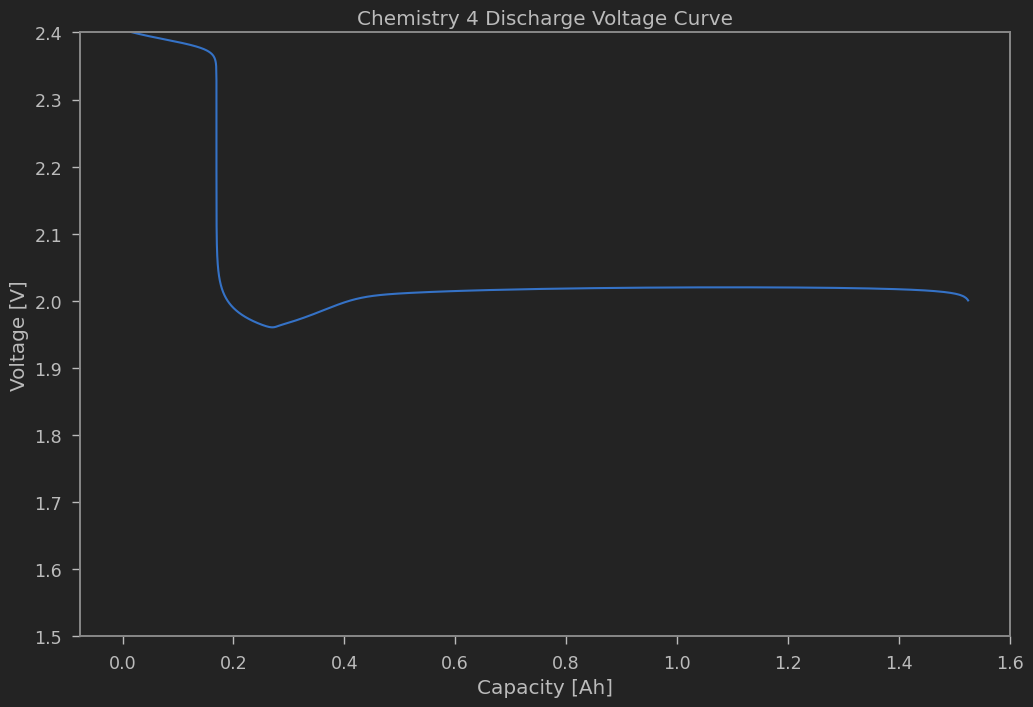

In [337]:
capacity = 1.7*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)
#plt.xlim([0,3.5])
plt.ylim([1.5,2.4])
plt.title('Chemistry 4 Discharge Voltage Curve')
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

Text(0, 0.5, 'Li ion [g]')

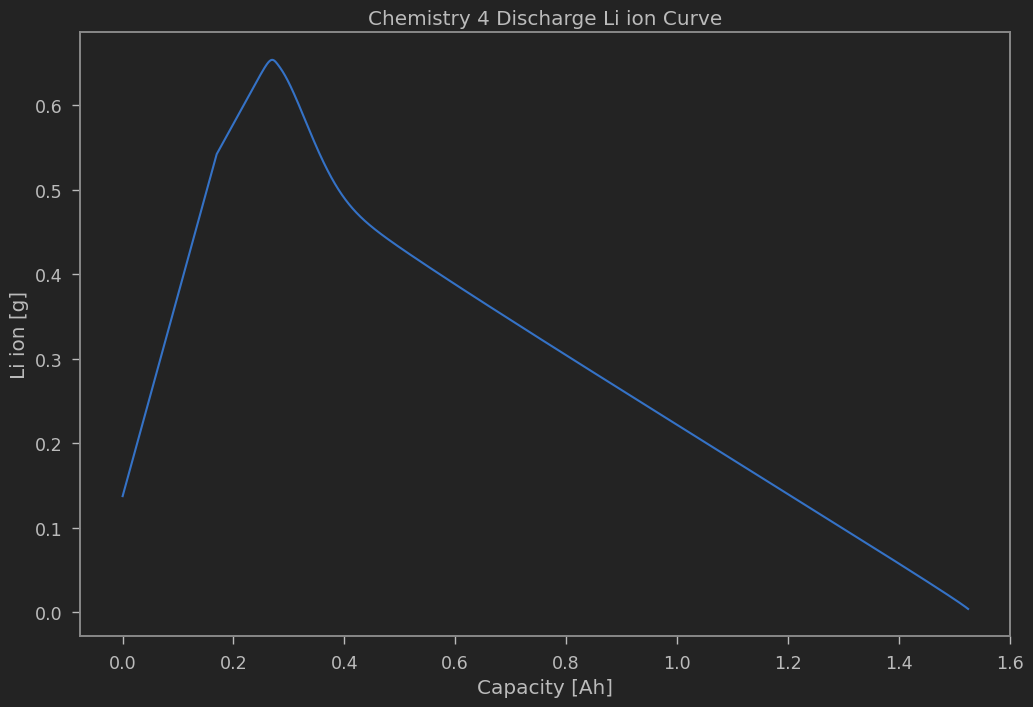

In [338]:
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)
plt.title('Chemistry 4 Discharge Li ion Curve')
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

Text(0.5, 1.0, 'Chemistry 4 Discharge Unfitting Resistance Curve')

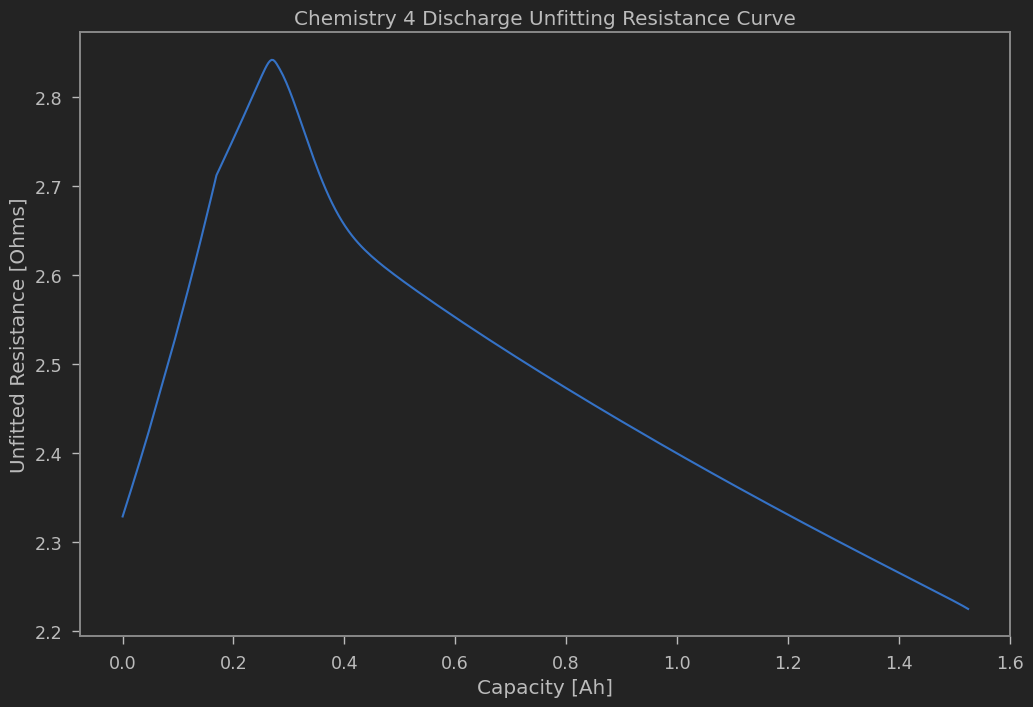

In [328]:
sigma_0 = 3
l =  1
A = 0.15

capacity = 1.7*sim.solution.t/3600
#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 
b = 1
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity,R)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Unfitted Resistance [Ohms]')
plt.title('Chemistry 4 Discharge Unfitting Resistance Curve')

In [341]:
data_Sp_dict = {}

In [370]:
# Effects of Sp initial condition
Sp_initial = 10e-2

model = pybamm.lithium_sulfur.ZeroD_Chemistry_4()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        "Exchange current density L [A.m-2]": il0
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [371]:
time = 10*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 3206.1 and h = 4.76837e-08, the corrector convergence failed repeatedly or with |h| = hmin.
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

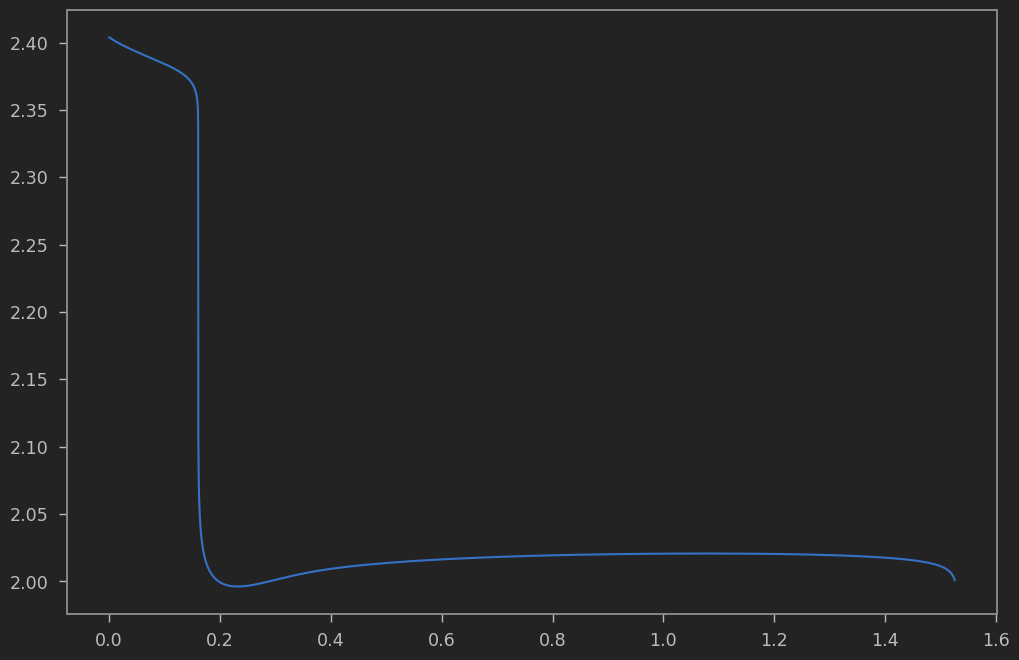

In [372]:
capacity = 1.7*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)
#S6 = sim.solution['S6 [g]'].entries


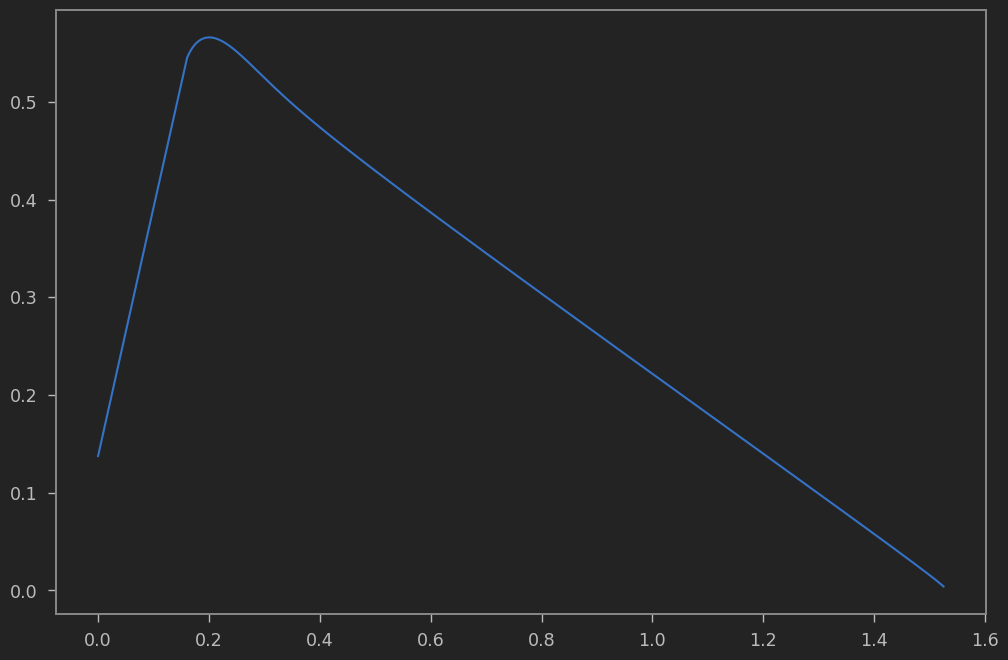

In [373]:
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)



In [374]:
data_Sp_dict[str(Sp_initial)] = [capacity, V, Li]

Text(0, 0.5, 'Voltage [V]')

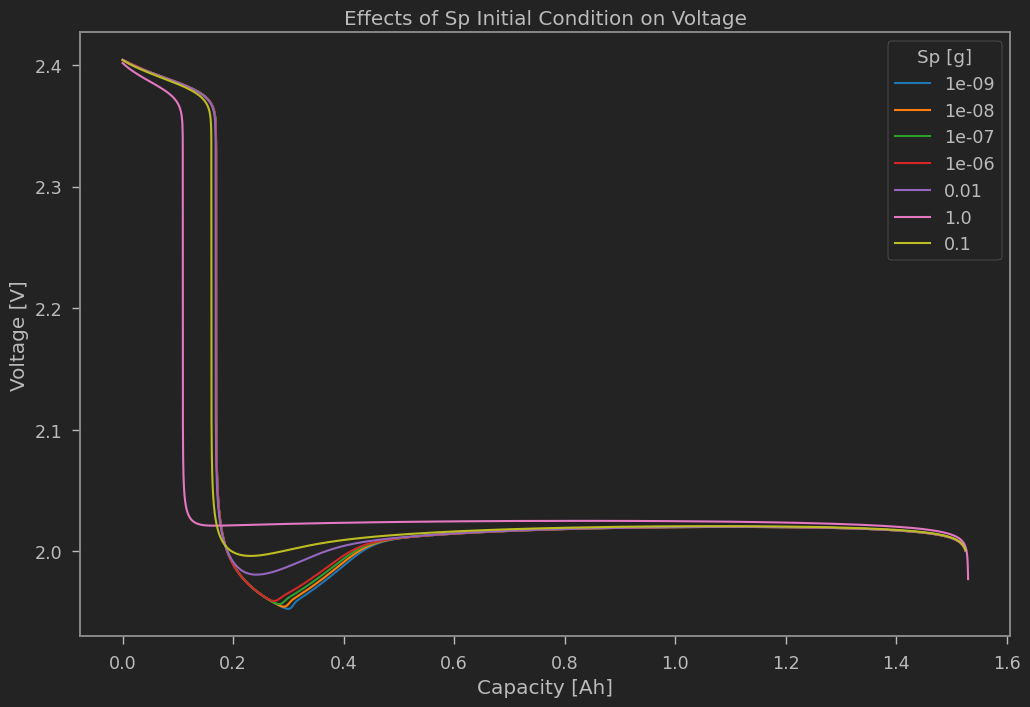

In [383]:
color_palette = ['tab:blue',
                 'tab:orange',
                 'tab:green',
                 'tab:red',
                 'tab:purple',
                 'tab:pink',
                'tab:olive',
                'tab:cyan']
color_index = 0
for key in data_Sp_dict.keys():
    c = data_Sp_dict[key][0]
    v = data_Sp_dict[key][1]
    plt.plot(c,v, color_palette[color_index])
    color_index += 1
    
plt.legend(data_Sp_dict.keys(), title = 'Sp [g]')
plt.title("Effects of Sp Initial Condition on Voltage")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

Text(0, 0.5, 'Li ion [g]')

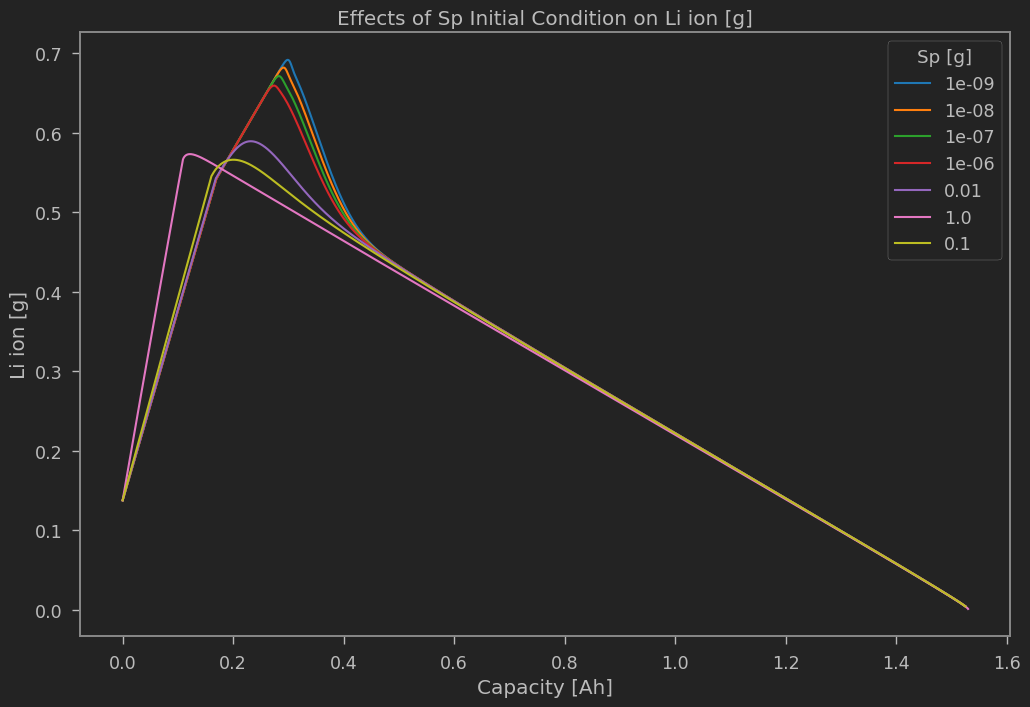

In [385]:
color_palette = ['tab:blue',
                 'tab:orange',
                 'tab:green',
                 'tab:red',
                 'tab:purple',
                 'tab:pink',
                'tab:olive',
                'tab:cyan']
color_index = 0
for key in data_Sp_dict.keys():
    c = data_Sp_dict[key][0]
    l = data_Sp_dict[key][2]
    plt.plot(c,l, color_palette[color_index])
    color_index += 1
    
plt.legend(data_Sp_dict.keys(), title = 'Sp [g]')
plt.title("Effects of Sp Initial Condition on Li ion [g]")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

Text(0, 0.5, 'Proportional to Resistance [Ohm]')

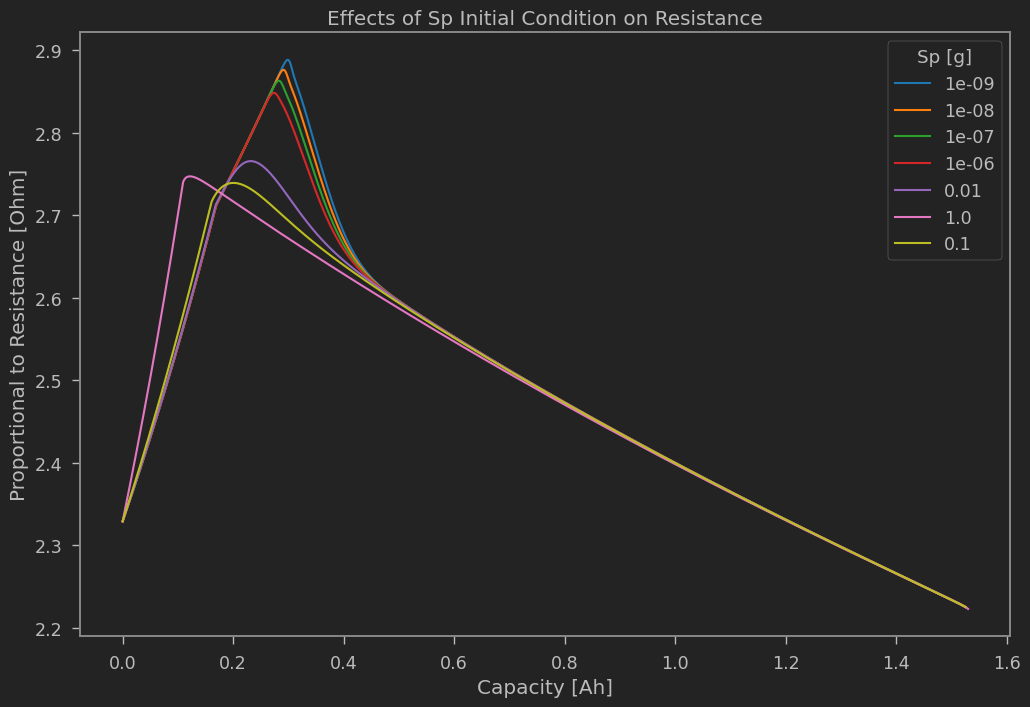

In [387]:
sigma_0 = 3
l =  1
A = 0.15
b = 1
color_palette = ['tab:blue',
                 'tab:orange',
                 'tab:green',
                 'tab:red',
                 'tab:purple',
                 'tab:pink',
                'tab:olive',
                'tab:cyan']
color_index = 0
for key in data_Sp_dict.keys():
    c = data_Sp_dict[key][0]
    Li = data_Sp_dict[key][2]
    sigma = sigma_0 - b*(Li)
    R = l/(A*sigma)
    plt.plot(c,R, color_palette[color_index])
    color_index += 1
    
plt.legend(data_Sp_dict.keys(), title = 'Sp [g]')
plt.title("Effects of Sp Initial Condition on Resistance")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Proportional to Resistance [Ohm]')


# Concentration Dependence

In [381]:
cap = 0.211

Ms = 32
F = 9.649e4
V = 2.4
R = 8.3145
T = 298
ar = 0.960
I = cap*1#1.7
nu = 0.0114

#f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
#f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
#f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

EL0 = 1.5
EM0 = 1.6
EH0 = 2.35



ih0 = 10
im0 = 5
il0 = 5
    

def S2_func(S4):
    constant = f_m*np.exp(F*(EM0-V)/(R*T))
    return constant*np.sqrt(S4)

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

def S8_func(S4):
    S2 = S2_func(S4)
    return ((3600*cap*Ms/F) - S2 - 1.5*S4)/2

def S4_root(S4):
    S8 = S8_func(S4)
    EH = EH0 + (R*T/F)*np.log( f_h*(S8**(1/4)) / (S4**(1/2)) )
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
    return I - iH

<ipython-input-7-fca293925763>:50: RuntimeWarning: invalid value encountered in sqrt
  EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )


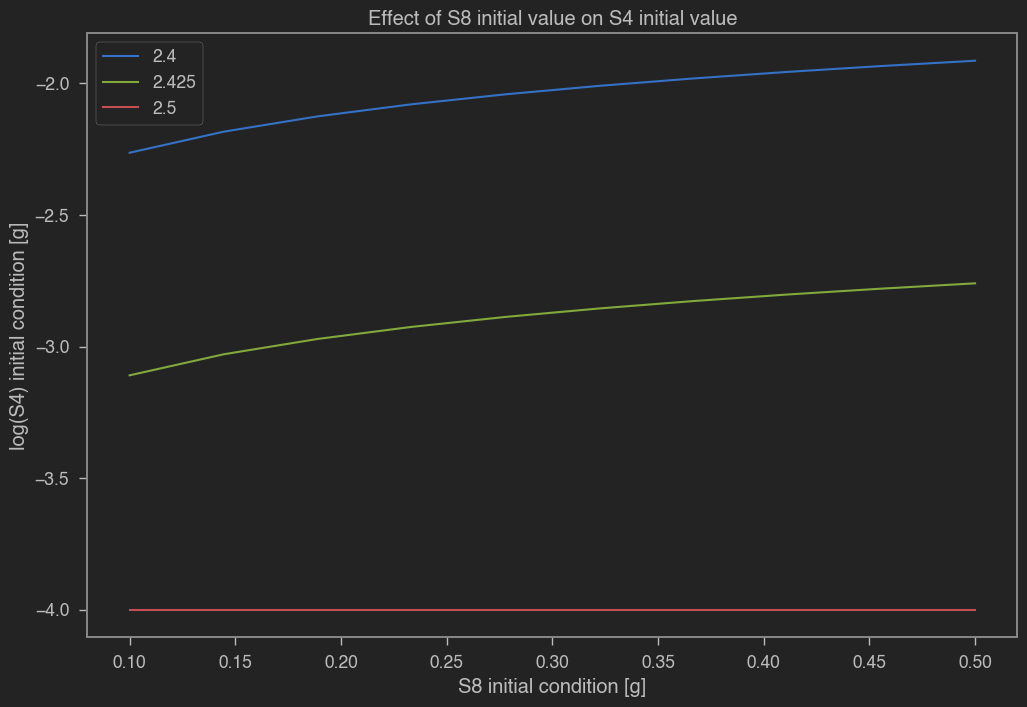

In [7]:
value_list = np.linspace(0.1,.5,10)
V_list = [2.4,2.425,2.5]
for V_temp in V_list:
    S4_initial_list = []
    for value in value_list:
        cap = 0.211

        Ms = 32
        F = 9.649e4
        V = V_temp
        R = 8.3145
        T = 298
        ar = 0.960
        I = cap*0.2#1.7
        nu = 0.0114

        #f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
        #f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
        #f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

        f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
        f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
        f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

        EL0 = 1.9
        EM0 = 1.95
        EH0 = 2.35



        ih0 = 10
        im0 = 5
        il0 = 5

        S8_initial = value
        def S2_func(S4):
            constant = f_m*np.exp(F*(EM0-V)/(R*T))
            return constant*np.sqrt(S4)

        def S1_func(S2):
            constant = f_l*np.exp(F*(EL0-V)/(R*T))
            return constant*np.sqrt(S2)

        def S8_func(S4):
            S2 = S2_func(S4)
            return ((3600*cap*Ms/F) - S2 - 1.5*S4)/2

        def S4_root(S4):

            EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )
            eta_H = V - EH
            iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
            return I - iH

        S4 = root(S4_root, 10e-5)
        S4_initial = S4['x'][0]
        S4_initial_list.append(S4_initial)
    plt.plot(value_list,np.log10(S4_initial_list))

plt.xlabel('S8 initial condition [g]')
plt.ylabel('log(S4) initial condition [g]')
plt.title('Effect of S8 initial value on S4 initial value')
plt.legend(V_list)

In [ ]:
2.4241430201853356

Text(0.5, 1.0, 'Effect of S8 initial value on S4 initial value')

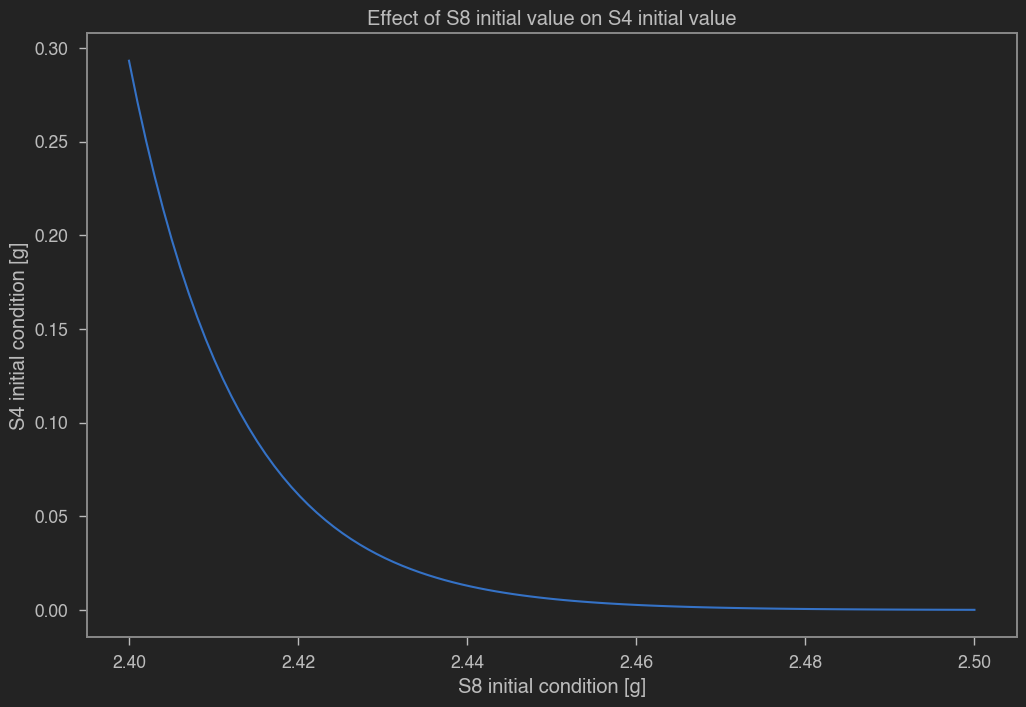

In [83]:
value_list = np.linspace(0.1,.5,10)
V_list = [2.4241430201853356]
V_list = np.linspace(2.4,2.5,100)
S4_initial_list = []
for V_temp in V_list:
  
    
    cap = 0.211

    Ms = 32
    F = 9.649e4
    V = V_temp
    R = 8.3145
    T = 298
    ar = 0.960
    I = cap*0.2#1.7
    nu = 0.0114

    #f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
    #f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
    #f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

    f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
    f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
    f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

    EL0 = 1.9
    EM0 = 2.35
    EH0 = 2.4



    ih0 = 10
    im0 = 5
    il0 = 5

    S8_initial = 0.12
    def S2_func(S4):
        constant = f_m*np.exp(F*(EM0-V)/(R*T))
        return constant*np.sqrt(S4)

    def S1_func(S2):
        constant = f_l*np.exp(F*(EL0-V)/(R*T))
        return constant*np.sqrt(S2)

    def S8_func(S4):
        S2 = S2_func(S4)
        return ((3600*cap*Ms/F) - S2 - 1.5*S4)/2

    def S4_root(S4):

        EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )
        eta_H = V - EH
        iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
        return I - iH

    S4 = root(S4_root, 10e-9)
    S4_initial = S4['x'][0]
    S4_initial_list.append(S4_initial)
plt.plot(V_list,S4_initial_list)

plt.xlabel('S8 initial condition [g]')
plt.ylabel('S4 initial condition [g]')
plt.title('Effect of S8 initial value on S4 initial value')


In [34]:

# First find the root for S8
S4 = root(S4_root, 10e-9)
S4_initial = S4['x'][0]
print('S4 initial')
print(S4_initial)

# Check root function is successful
print('Root')
print(S4_root(S4_initial))

# Second solve for S4 in terms of S8
S8_initial = S8_func(S4_initial)
print('S8 initial')
print(S8_initial)

# Third solve for S2 in terms of S4
S2_initial = S2_func(S4_initial)
print('S2 initial')
print(S2_initial)

# check that V = EM0
print('EM0 initial')
print(EM0 + (R*T)*np.log(f_m*(S4_initial**(1/2))/S2_initial)/(F))

# capacity check
print('Capacity')
print(F*( S2_initial + 1.5*S4_initial + 2*S8_initial   )/(3600*Ms))

# current check
EH = EH0 + (R*T)*np.log(f_h*(S8_initial**(1/4))/(S4_initial**(1/2)))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
print('iH initial')
print(iH)

# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
print('S1 initial')
print(S1_initial)

# check that V = EL0
print('EL0 initial')
print(EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F))

S4 initial
2.4745146076123433e-06
Root
-1.7388868123191514e-14
S8 initial
0.12595523811318549
S2 initial
4.739802118884644e-13
EM0 initial
2.5
Capacity
0.211
iH initial
0.15844539952064066
S1 initial
2.09287279793108e-17
EL0 initial
2.5


In [375]:
epsilon = 0.1
x = 0.00000001
kappa = 2 * np.log((1-epsilon)/epsilon)/ ( (1-x)*S8_initial )
gamma = (epsilon/(1-epsilon))*np.exp(kappa*S8_initial)

print(kappa)
print(gamma)

36.137122520441686
9.000000395500436


In [11]:
#filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

discharge_data['30']['internal voltage'][0]

2.4241430201853356

In [93]:
cap = 0.211

Ms = 32
F = 9.649e4
V = 2.45
R = 8.3145
T = 298
ar = 0.960
I = cap*0.2#1.7
nu = 0.114

#f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
#f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
#f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

EL0 = 1.5
EM0 = 2.35
EH0 = 2.4



ih0 = 5
im0 = 5
il0 = 5


S8_initial = .25

def S2_func(S4):
    constant = f_m*np.exp(F*(EM0-V)/(R*T))
    return constant*np.sqrt(S4)

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

def S8_func(S4):
    S2 = S2_func(S4)
    return ((3600*cap*Ms/F) - S2 - 1.5*S4)/2

def S4_root(S4):
    
    EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
    return I - iH

In [94]:
# First find the root for S8
S4 = root(S4_root, 10e-5)
S4_initial = S4['x'][0]
print('S4 initial')
print(S4_initial)

# Check root function is successful
print('Root')
print(S4_root(S4_initial))


# Third solve for S2 in terms of S4
S2_initial = S2_func(S4_initial)
print('S2 initial')
print(S2_initial)

# check that V = EM0
print('EM0 initial')
print(EM0 + (R*T)*np.log(f_m*(S4_initial**(1/2))/S2_initial)/(F))

# current check
EH = EH0 + (R*T)*np.log(f_h*(S8_initial**(1/4))/(S4_initial**(1/2)))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
print('iH initial')
print(iH)

# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
print('S1 initial')
print(S1_initial)

# check that V = EL0
print('EL0 initial')
print(EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F))

S4 initial
0.027014762187146005
Root
5.1285364843778325e-14
S2 initial
0.006390767839784824
EM0 initial
2.45
iH initial
0.042199999999948716
S1 initial
9.250749689102825e-18
EL0 initial
2.45


## Large EH0 and EM0 initial conditions with theoretical capacity restriction

Text(0.5, 0, 'S4')

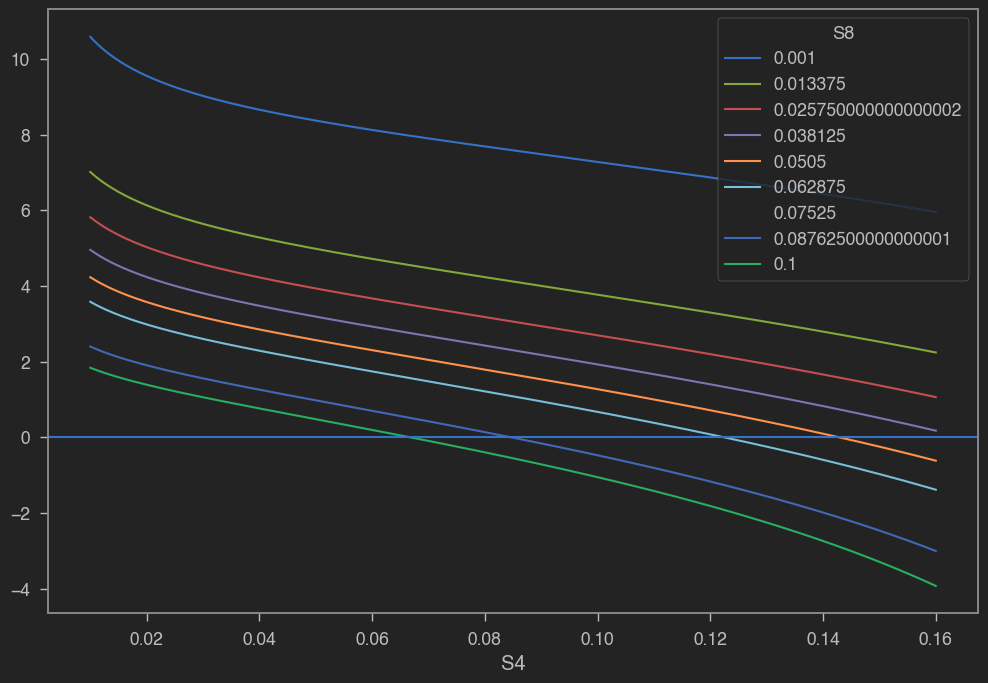

In [282]:
S8_initial_list = np.linspace(1,100,9)*10e-4
for S8_temp in S8_initial_list:
    cap = 0.211

    Ms = 32
    F = 9.649e4
    V = 2.45
    R = 8.3145
    T = 298
    ar = 0.960
    I = cap*0.2#1.7
    nu = 0.114

    #f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
    #f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
    #f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

    f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
    f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
    f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

    EL0 = 1.8
    EM0 = 2.41
    EH0 = 2.43

    ih0 = 5
    im0 = 5
    il0 = 5


    S8_initial = S8_temp

    def S1_func(S2):
        constant = f_l*np.exp(F*(EL0-V)/(R*T))
        return constant*np.sqrt(S2)

    #def S2_func(S4, S8):
    #    return 0.336 - S4 - S8
    S2_initial = 0.4

    def S4_root(S4):

        EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )
        eta_H = V - EH
        iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))

        S2 = S2_func(S4,S8_initial)

        EM = EM0 + (R*T/F)*np.log( f_m*(S4**(1/2)) / S2 ) 
        eta_M = V - EM
        iM = -2*im0*ar*np.sinh(F*eta_M/(2*R*T))

        return I - iH - iM
    

    xx = np.linspace(0.01,.16,1000)
    plt.plot(xx,S4_root(xx))
    
plt.legend(S8_initial_list,title="S8")
plt.axhline(0)
plt.xlabel('S4')

In [291]:
cap = 0.211

Ms = 32
F = 9.649e4
V = 2.45
R = 8.3145
T = 298
ar = 0.960
I = cap*0.2#1.7
nu = 0.114

#f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
#f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
#f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

f_h = ((4 ** 2) * Ms * nu / 8)**(1/4)
f_m = ((2 ** 2) * Ms * nu / 4)**(1/2)
f_l = ((1 ** 2) * Ms * nu / 2)**(1/2)

EL0 = 1.8
EM0 = 2.41
EH0 = 2.43

ih0 = 5
im0 = 5
il0 = 5


S8_initial = 0.13

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

#def S2_func(S4, S8):
#    return 0.336 - S4 - S8
#S2_initial = 0.4
def S4_root(S4):

    EH = EH0 + (R*T/F)*np.log( f_h*(S8_initial**(1/4)) / (S4**(1/2)) )
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))

    S2 = S2_func(S4,S8_initial)

    EM = EM0 + (R*T/F)*np.log( f_m*(S4**(1/2)) / S2 ) 
    eta_M = V - EM
    iM = -2*im0*ar*np.sinh(F*eta_M/(2*R*T))

    return I - iH - iM

In [292]:
print('S8 initial')
print(S8_initial)

# First find the root for S4
S4 = root(S4_root, 0.16)
S4_initial = S4['x'][0]
print('S4 initial')
print(S4_initial)

# Check root function is successful
print('Root')
print(S4_root(S4_initial))

# Third solve for S2 in terms of S4
#S2_initial = S2_func(S4_initial, S8_initial)
S2_initial = .336 - S8_initial-S4_initial
print('S2 initial')
print(S2_initial)

# check that V = EM0
print('EM0 initial')
print(EM0 + (R*T)*np.log(f_m*(S4_initial**(1/2))/S2_initial)/(F))

# current check
EH = EH0 + (R*T)*np.log(f_h*(S8_initial**(1/4))/(S4_initial**(1/2)))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
print('iH initial')
print(iH)

EM = EM0 + (R*T/F)*np.log( f_m*(S4_initial**(1/2)) / S2_initial ) 
eta_M = V - EM
iM = -2*im0*ar*np.sinh(F*eta_M/(2*R*T))
print('iM initial')
print(iM)

print('iH+iM')
print(iH+iM)

# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
print('S1 initial')
print(S1_initial)

# check that V = EL0
print('EL0 initial')
print(EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F))

S8 initial
0.13
S4 initial
0.025212431982245608
Root
-4.1744385725905886e-14
S2 initial
0.18078756801775442
EM0 initial
2.4232838378679085
iH initial
5.264467216914765
iM initial
-5.222267216914723
iH+iM
0.04220000000004198
S1 initial
5.831892837542254e-12
EL0 initial
2.45


In [293]:
# Effects of Sp initial condition
Sp_initial = 10e-3

model = pybamm.lithium_sulfur.ZeroD_Chemistry_4()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": .0422,
        "Initial Condition for Terminal Voltage [V]": 2.45,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        "Exchange current density L [A.m-2]": il0,
        "Exchange current density M [A.m-2]": im0,
        "Exchange current density H [A.m-2]": ih0,
        "Active reaction area per cell [m2]":ar,
        "S saturation mass [g]": S1_initial,
        'gamma': 0,#10,
        'kappa': 0,
        'Shuttle rate coefficient during charge [s-1]': 0,
        'Shuttle rate coefficient during discharge [s-1]': 0,
        #'Precipitation rate [s-1]': 1000
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 4500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [309]:
def negativity_check(sim):
    S8_end = sim.solution['S8 [g]'].entries[-1]
    S4_end = sim.solution['S4 [g]'].entries[-1]
    S2_end = sim.solution['S2 [g]'].entries[-1]
    S1_end = sim.solution['S [g]'].entries[-1]
    Sp_end = sim.solution['Precipitated Sulfur [g]'].entries[-1]
    if S8_end < 0 or S4_end < 0 or S2_end < 0 or S1_end < 0 or Sp_end < 0:
        print('Negative Species Values!')
        print(S8_end)
        print(S4_end)
        print(S2_end)
        print(S1_end)
        print(Sp_end)
        return True
    else:
        return False
    
def time_check(sim):
    time = 16500#24800#int(10 * cap*3600/I)# 3000#3240
    if sim.solution.t[-1] > time:
        return True
    else:
        return False
    
condition = True 
break_condition = True
print('\n\n\n\n\n Trying 100 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(100)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 50 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(50)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 10 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(10)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 1 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(1)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False






 Trying 100 










 Trying 50 










 Trying 10 










 Trying 1 







psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
At t = 15930 and h =

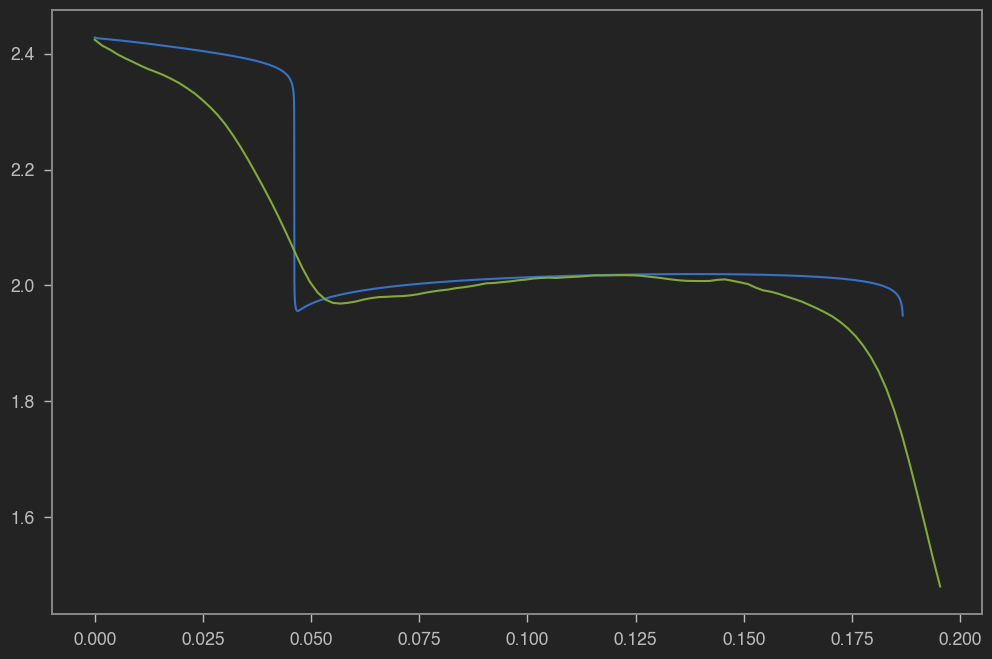

In [310]:
capacity = 0.0422*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

# get experimental data
#filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])

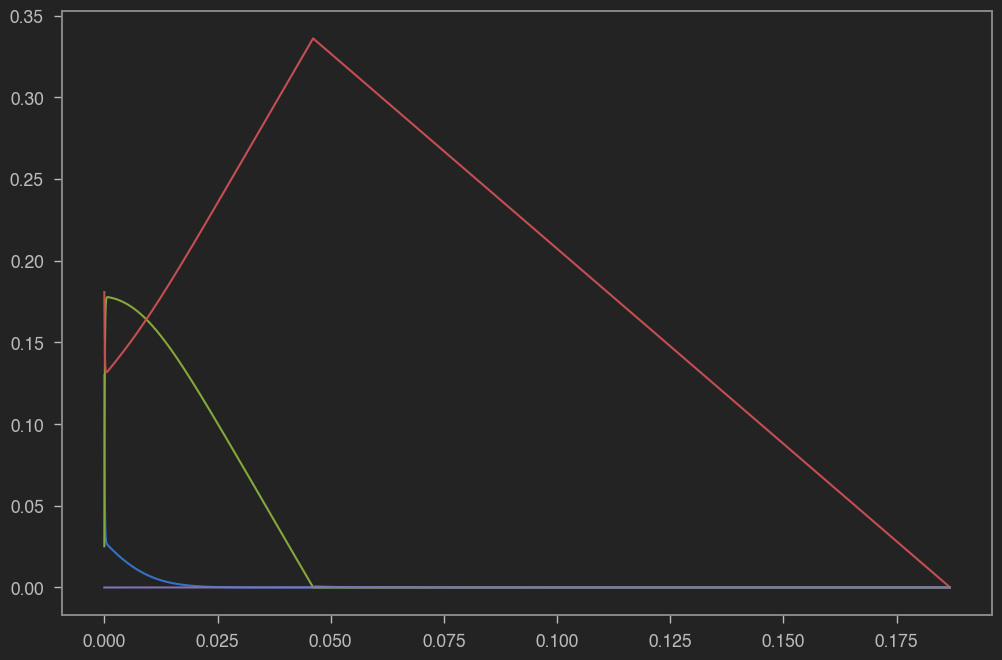

In [306]:
plt.plot(sim.solution.t*0.0422/3600,sim.solution["S8 [g]"].entries)
plt.plot(sim.solution.t*0.0422/3600,sim.solution["S4 [g]"].entries)
plt.plot(sim.solution.t*0.0422/3600,sim.solution["S2 [g]"].entries)
plt.plot(sim.solution.t*0.0422/3600,sim.solution["S [g]"].entries)

(-0.0844, 0.0844)

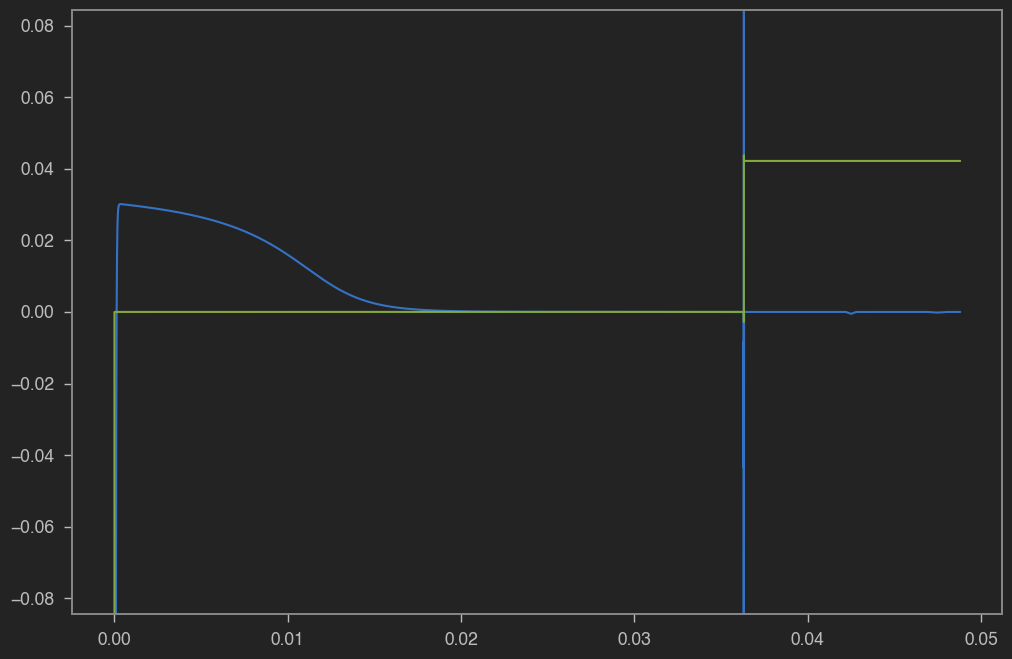

In [214]:
plt.plot(sim.solution.t*0.0422/3600,sim.solution["High plateau current [A]"].entries)
plt.plot(sim.solution.t*0.0422/3600,sim.solution["Low plateau current [A]"].entries)
plt.ylim(-2*0.0422,2*0.0422)

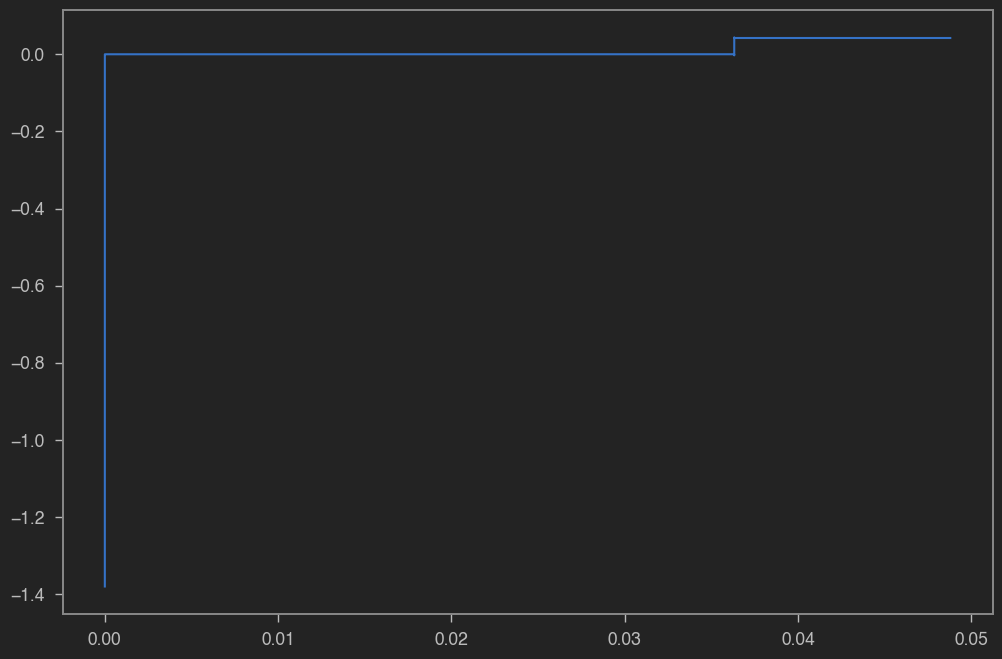

In [215]:
plt.plot(sim.solution.t*0.0422/3600,sim.solution["Low plateau current [A]"].entries)

Text(0, 0.5, 'Li ion [g]')

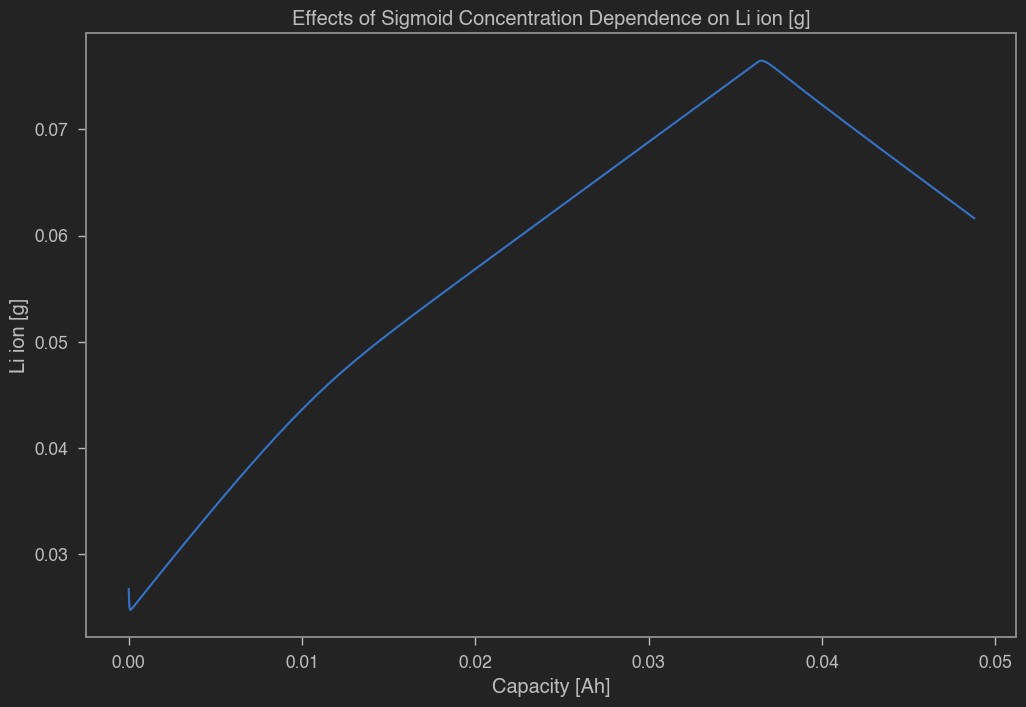

In [216]:
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)
    
plt.title("Effects of Sigmoid Concentration Dependence on Li ion [g]")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

Text(0, 0.5, 'Proportional to Resistance [Ohm]')

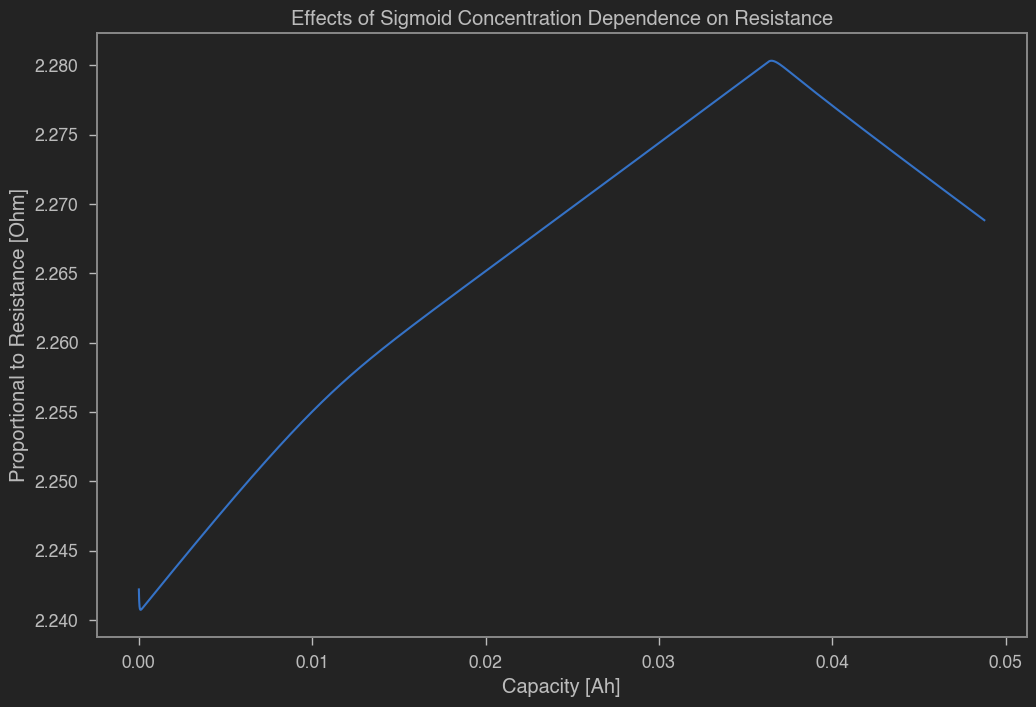

In [217]:
sigma_0 = 3
l =  1
A = 0.15
b = 1

sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity,R)
    
plt.title("Effects of Sigmoid Concentration Dependence on Resistance")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Proportional to Resistance [Ohm]')

In [316]:
sim.solution.t[-1]

14500.0

# Chemistry 5 Discharge

In [322]:
Ms = 32
F = 9.649e4
V = 2.4
R = 8.3145
T = 298
ar = 0.960
I = 0.0422#1.7
nu = 0.0114

#f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
#f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
#f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

f_h = (4**(1/6))*(6**(1/6))*(Ms**(1/3)) * (nu ** (1/3)) / (8 ** (1/6))
f_m = (2**(5/6))*(Ms**(1/2))*(nu**(1/2))/((4**(1/6))*(6 ** (1/6)))
f_l = 1 * (Ms ** (1/2)) * (nu** (1/2)) / (2**(1/2))

EL0 = 1.85
EM0 = 1.9
EH0 = 2.4



ih0 = 10
im0 = 5
il0 = 5


S8_initial = 0.1#0.14326873
S6_initial = .5

def S2_func(S4,S6):
    constant = f_m*np.exp(6*F*(EM0-V)/(5*R*T))
    return constant*(S4**(1/5))*(S6**(1/5))

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

def S4_root(S4):
    
    EH = EH0 + (R*T/F)*np.log(f_h*(S8_initial**(1/6))/((S6_initial**(1/3))*(S4**(1/6))) )
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
    return I - iH

In [323]:
print("S8 initial")
print(S8_initial)

print("S6 initial")
print(S6_initial)

# First find the root for S8
S4 = root(S4_root, 10e-14)
S4_initial = S4['x'][0]
print('S4 initial')
print(S4_initial)

# Check root function is successful
print('Root')
print(S4_root(S4_initial))


# Third solve for S2 in terms of S4
S2_initial = S2_func(S4_initial,S6_initial)
print('S2 initial')
print(S2_initial)

# check that V = EM0
print('EM0 initial')
EM = EM0 + (R*T)*np.log(f_m*(S4_initial**(1/6))*(S6_initial**(1/6))/(S2_initial**(5/6)))/(F)
print(EM)

# current check
EH = EH0 + (R*T)*np.log(f_h*(S8_initial**(1/6))/((S6_initial**(1/3))*(S4_initial**(1/6))))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
print('iH initial')
print(iH)

# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
print('S1 initial')
print(S1_initial)

# check that V = EL0
print('EL0 initial')
EL = EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F)
print(EL)

S8 initial
0.1
S6 initial
0.5
S4 initial
0.1555379596678033
Root
-1.7388868123191514e-14
S2 initial
2.7062139529961696e-11
EM0 initial
2.398047336393404
iH initial
0.04220000000001739
S1 initial
1.1083610781547803e-15
EL0 initial
2.4


In [324]:
# Quick check

if abs(S4_root(S4_initial)) < 10e-10:
    print('Root Pass!')
else:
    print("FAIL!!!!!!!")
if abs(EM - 2.4) < 10e-1:
    print('EM Pass!')
else:
    print("FAIL!!!!!!!")
if abs(EL - 2.4) < 10e-1:
    print('EL Pass!')
else:
    print("FAIL!!!!!!!")
    
if abs(iH - 0.0422) < 10e-10:
    print('iH Pass!')
else:
    print("FAIL!!!!!!!")

Root Pass!
EM Pass!
EL Pass!
iH Pass!


In [360]:
# Effects of Sp initial condition
Sp_initial = 10e-10

model = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 0.0422,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S6 ion [g]" : S6_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        #"Exchange current density L [A.m-2]": il0,
        #"Exchange current density M [A.m-2]": im0,
        #"Exchange current density H [A.m-2]": ih0,
        #"Active reaction area per cell [m2]":ar,
        "S saturation mass [g]": S1_initial,
        #'gamma': gamma*0,#10,
        #'kappa': kappa*0,
        'Shuttle rate coefficient during charge [s-1]': 0,
        'Shuttle rate coefficient during discharge [s-1]': 0,
        #'Precipitation rate [s-1]': 10
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 5000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [ ]:
def negativity_check(sim):
    S8_end = sim.solution['S8 [g]'].entries[-1]
    S4_end = sim.solution['S4 [g]'].entries[-1]
    S2_end = sim.solution['S2 [g]'].entries[-1]
    S1_end = sim.solution['S [g]'].entries[-1]
    Sp_end = sim.solution['Precipitated Sulfur [g]'].entries[-1]
    if S8_end < 0 or S4_end < 0 or S2_end < 0 or S1_end < 0 or Sp_end < 0:
        print('Negative Species Values!')
        print(S8_end)
        print(S4_end)
        print(S2_end)
        print(S1_end)
        print(Sp_end)
        return True
    else:
        return False
    
def time_check(sim):
    time = 18000#24800#int(10 * cap*3600/I)# 3000#3240
    if sim.solution.t[-1] > time:
        return True
    else:
        return False
    
condition = True 
break_condition = True
print('\n\n\n\n\n Trying 100 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(100)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 50 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(50)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 10 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(10)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False

condition = True 
print('\n\n\n\n\n Trying 1 \n\n\n\n\n')
while condition and break_condition:
    try:
        sim.step(1)
        if negativity_check(sim) or time_check(sim):
            break_condition = False
    except:
        condition = False






 Trying 100 







In [ ]:
capacity = 0.0422*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

# get experimental data
filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
infile = open(filename,'rb')
data_dict = pickle.load(infile)
infile.close()

discharge_data = data_dict['discharge']
charge_data = data_dict['charge']

plt.plot(discharge_data['30']['capacity'],discharge_data['30']['internal voltage'])

In [353]:
sim.solution['S8 [g]'].entries[-2]

2.6425215291297748e-36

In [ ]:
S8_initial_cha =sim.solution['S8 [g]'].entries[-2]
S6_initial_cha =sim.solution['S6 [g]'].entries[-2]
S4_initial_cha =sim.solution['S4 [g]'].entries[-2]
S2_initial_cha =sim.solution['S2 [g]'].entries[-2]
S1_initial_cha =sim.solution['S [g]'].entries[-2]
Sp_initial_cha =sim.solution['Precipitated sulfur [g]'].entries[-2]

In [ ]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_5()

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 0.0422,
        "Initial Condition for Terminal Voltage [V]": 1.5,
        "Initial Condition for S8 ion [g]" : S8_initial_cha,
        "Initial Condition for S4 ion [g]" : S4_initial_cha,
        "Initial Condition for S2 ion [g]" : S2_initial_cha,
        "Initial Condition for S ion [g]" : S1_initial_cha,
        "Initial Condition for Precipitated Sulfur [g]" : Sp_initial_cha,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        #"Exchange current density L [A.m-2]": il0,
        #"Exchange current density M [A.m-2]": im0,
        #"Exchange current density H [A.m-2]": ih0,
        #"Active reaction area per cell [m2]":ar,
        "S saturation mass [g]": S1_initial,
        #'gamma': gamma*0,#10,
        #'kappa': kappa*0,
        'Shuttle rate coefficient during charge [s-1]': 0,
        'Shuttle rate coefficient during discharge [s-1]': 0,
        #'Precipitation rate [s-1]': 10
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 30#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

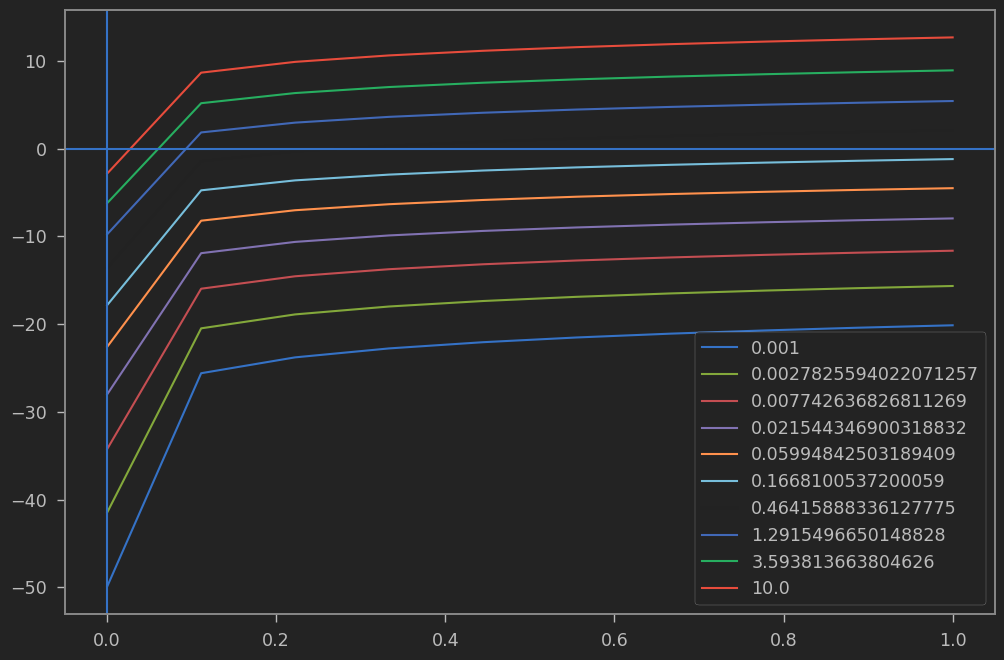

In [145]:
S6_initial_list = 10**np.linspace(-3,1,10)
for S6_initial_test in S6_initial_list:
    Ms = 32
    F = 9.649e4
    V = 2.4
    R = 8.3145
    T = 298
    ar = 0.960
    I = 0.0422#1.7
    nu = 0.0114

    #f_l = np.sqrt(nu*Ms/2)# (Ms*nu/2)**(1/2)
    #f_m = np.sqrt(nu*Ms)#(4*Ms*nu)**(1/2)
    #f_h = np.sqrt(nu*Ms)*2/(8**(1/4))#(16*Ms*nu)**(1/4)

    f_h = (4**(1/6))*(6**(1/6))*(Ms**(1/3)) * (nu ** (1/3)) / (8 ** (1/6))
    f_m = (2**(5/6))*(Ms**(1/2))*(nu**(1/2))/((4**(1/6))*(6 ** (1/6)))
    f_l = 1 * (Ms ** (1/2)) * (nu** (1/2)) / (2**(1/2))

    EL0 = 1.85
    EM0 = 1.9
    EH0 = 2.4



    ih0 = 10
    im0 = 5
    il0 = 5


    S8_initial = 0.15#0.14326873
    S6_initial = S6_initial_test#0.000000001

    def S2_func(S4,S6):
        constant = f_m*np.exp(6*F*(EM0-V)/(5*R*T))
        return constant*(S4**(1/5))*(S6**(1/5))

    def S1_func(S2):
        constant = f_l*np.exp(F*(EL0-V)/(R*T))
        return constant*np.sqrt(S2)

    def S4_root(S4):

        EH = EH0 + (R*T/F)*np.log(f_h*(S8_initial**(1/6))/((S6_initial**(1/3))*(S4**(1/6))) )
        eta_H = V - EH
        iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
        return I - iH
    
    z = np.linspace(10e-5, 10e-1,10)
    plt.plot(z, S4_root(z))
    
plt.legend(S6_initial_list)

plt.axvline(0)
plt.axhline(0)

In [133]:
 np.linspace(10e-13, 10e-5,10)

array([1.0000000e-12, 1.1111112e-05, 2.2222223e-05, 3.3333334e-05,
       4.4444445e-05, 5.5555556e-05, 6.6666667e-05, 7.7777778e-05,
       8.8888889e-05, 1.0000000e-04])